In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.max_rows', 100
)
url ="http://publicplansdata.org/api/"
focus_plans_list=['101', '110', '125', '179']
most_improved_list=['124', '90', '89', '134', '123']
least_improved_list=['41', '122', '120', '40', '119']
hardest_hit_list=['168', '130', '184', '151', '31']

In [3]:
#Make sure to use QDataset, NOT QDataSet.  Makes a big difference
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json"
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json"
}

In [4]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)

In [5]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()

In [6]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])

In [7]:
#remove rows with empty funded ratio data
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()

In [8]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]

In [9]:
plan_test_data_df=pd.merge(funded_ratio_df,plan_data_df,how="inner",on="ppd_id")
plan_test_data_df['ActFundedRatio_GASB'] = plan_test_data_df['ActFundedRatio_GASB'].astype(float)
plan_test_data_df['PercentReqContPaid'] = plan_test_data_df['PercentReqContPaid'].astype(float)

In [10]:
focus_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(focus_plans_list)]
mostimproved_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(most_improved_list)]
leastimproved_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(least_improved_list)]
hardesthit_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(hardest_hit_list)]

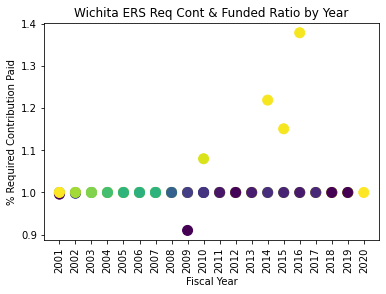

In [17]:
#Created a for loop to automatically build plots based on list of plan IDs
#Steady Plans
for plans in focus_plans_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

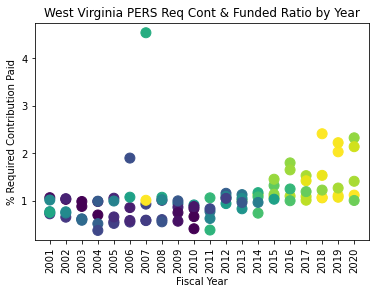

In [12]:
#Most Improved Plans
for plans in most_improved_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

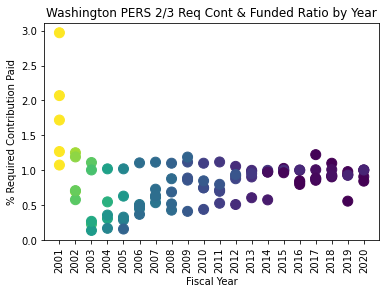

In [13]:
#Least Improved Plans
for plans in least_improved_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

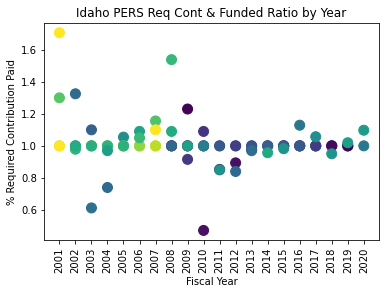

In [14]:
#Hardest Hit Plans
for plans in hardest_hit_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

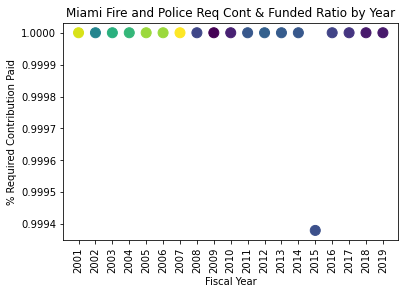

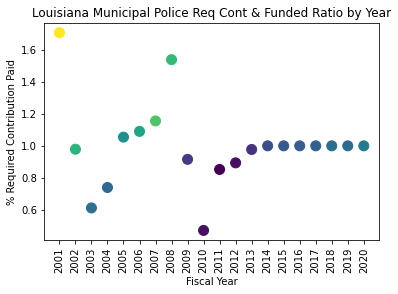

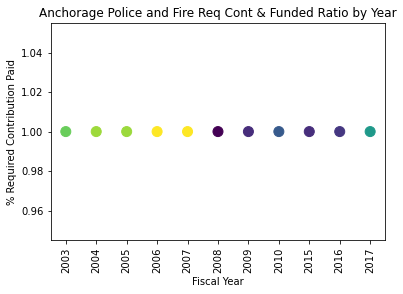

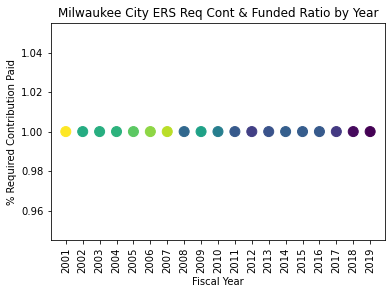

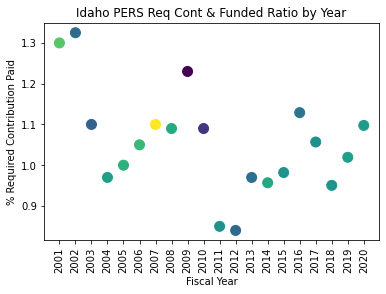

In [15]:
for plans in hardest_hit_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show()